In [13]:
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation as mad
from scipy.stats import iqr
from hyppo.ksample import MMD


In [2]:
with open('flickr_attentionheads_attentionmatrixV2-EN.json', 'r') as jsonFile:
    d = json.load(jsonFile)

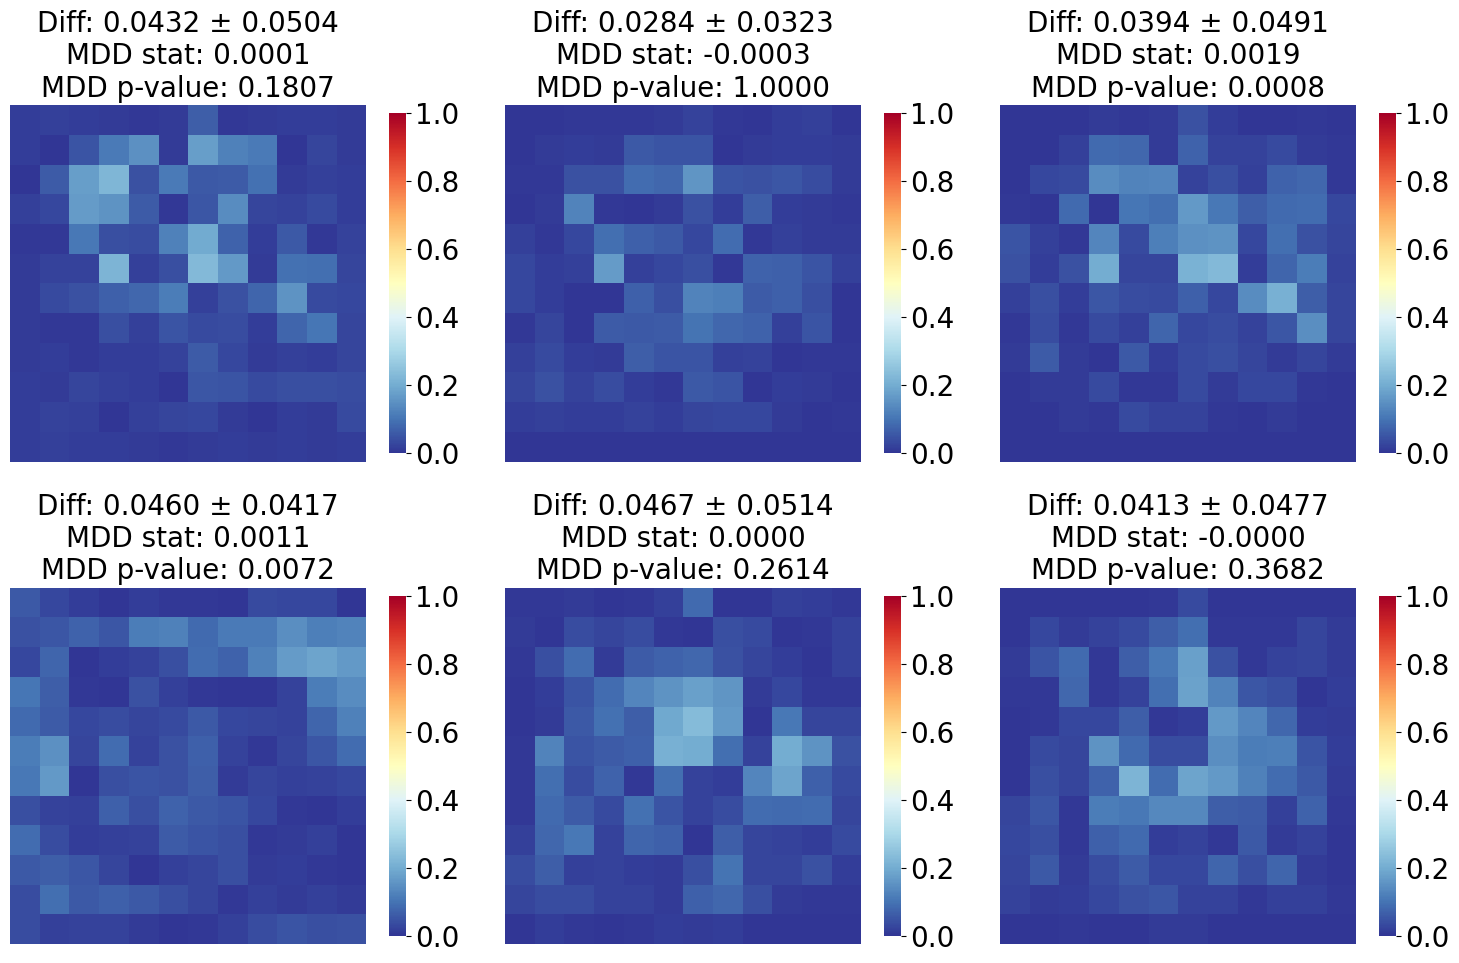

In [15]:
word1 = 'man'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'woman'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

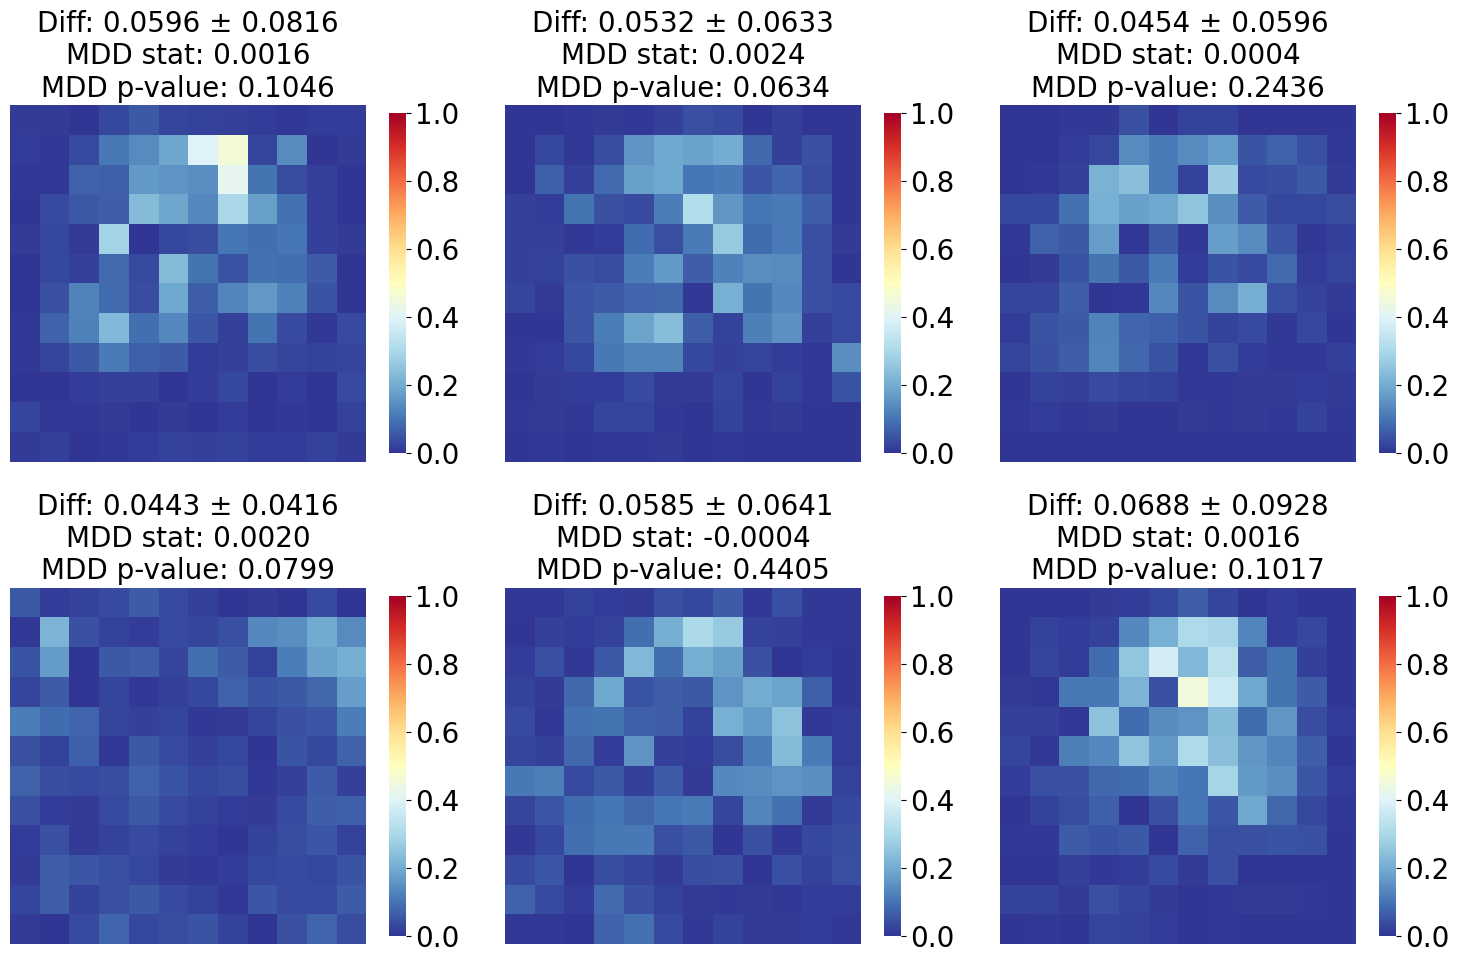

In [16]:
word1 = 'boy'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'girl'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

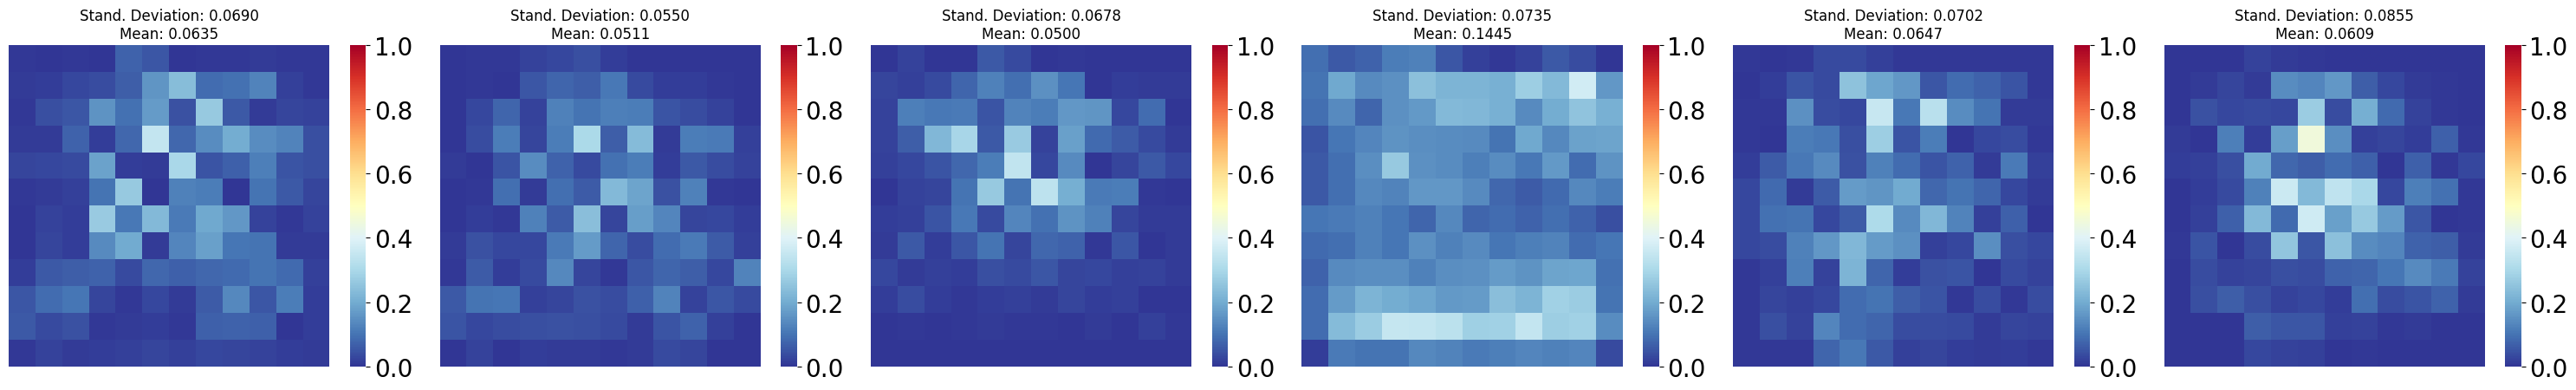

In [30]:
word1 = 'girl'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'dog'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].title.set_text(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           )
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

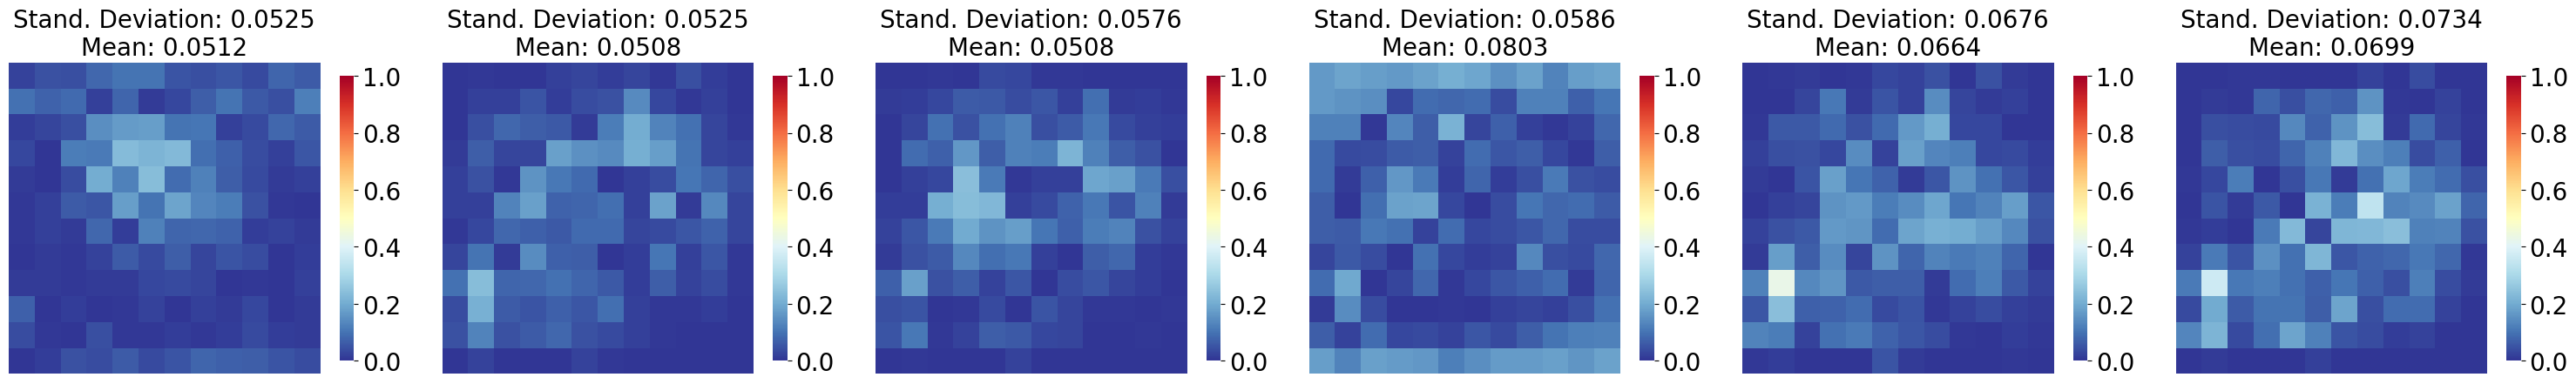

In [3]:
word1 = 'black'
heads = []
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'blue'
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .7})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

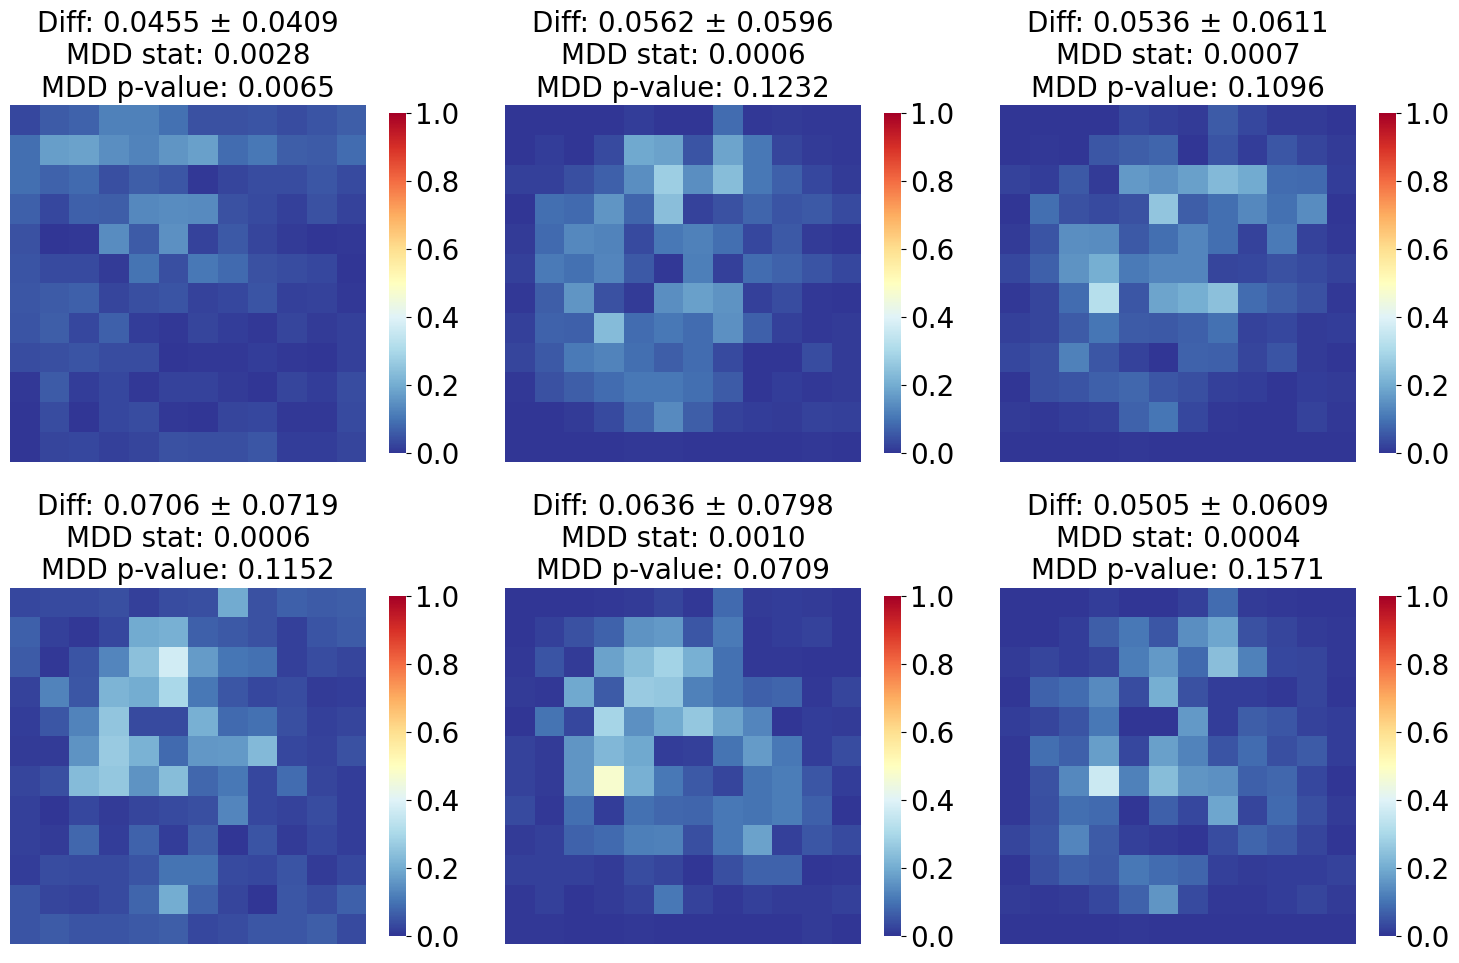

In [17]:
word1 = 'black'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'white'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

QTD run: 10
QTD looks: 2


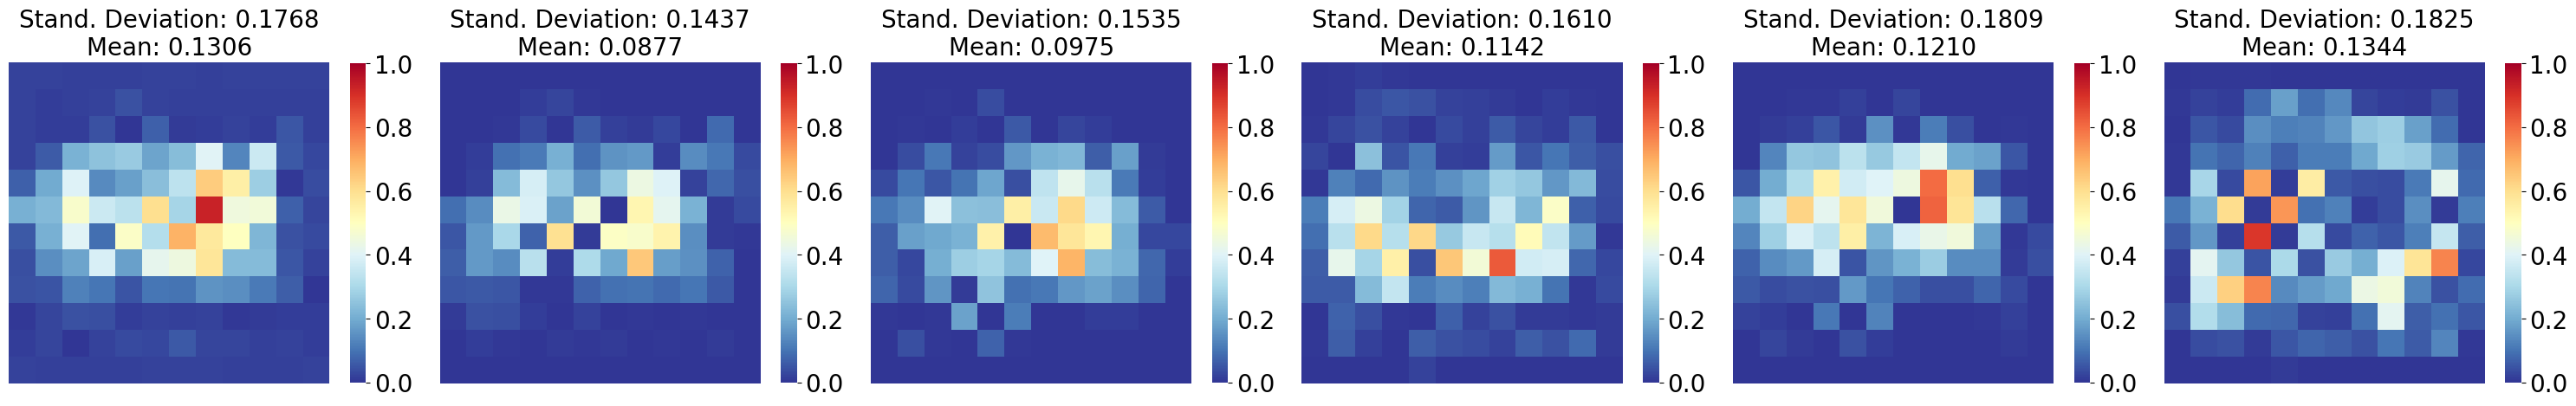

In [41]:
word1 = 'run'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'looks'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

QTD walking: 71
QTD work: 3


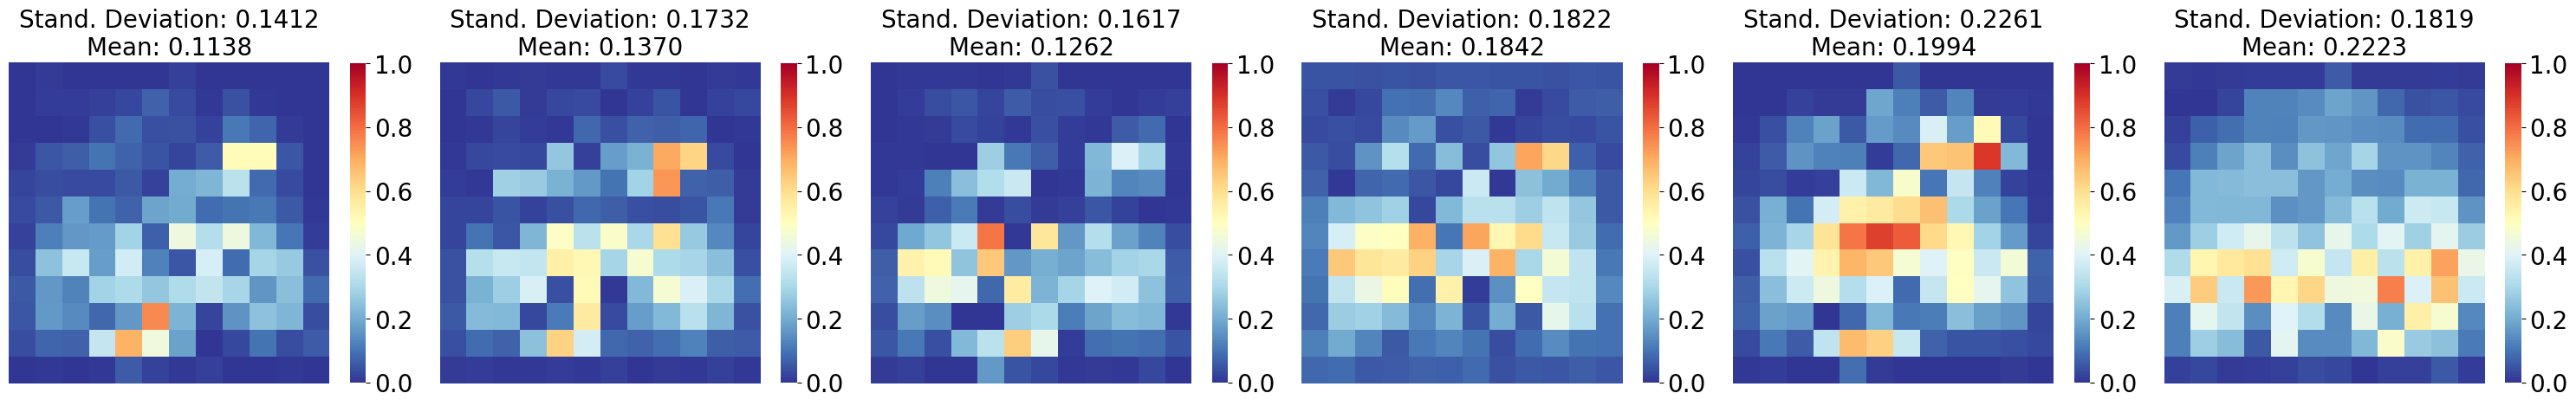

In [38]:
word1 = 'walking'
heads = []
array = np.array(d[f'{word1}_{i}'])
print(f'QTD {word1}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'work'
array = np.array(d[f'{word2}_{i}'])
print(f'QTD {word2}: {array.shape[0]}')
for i in range(6):
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
    heads[i] = abs(heads[i] - (mean / mean.max()))

fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(30,5))
for head in range(6):
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[head], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[head].set_title(f'Stand. Deviation: {heads[head].flatten().std():.4f}' \
                            f'\nMean: {heads[head].flatten().mean():.4f}' \
#                             f'\nMedian Abs Deviation: {mad(heads[head].flatten()):.4f}\n'
#                             f'\nInterquantile Range: {iqr(heads[head].flatten()):.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.png", )

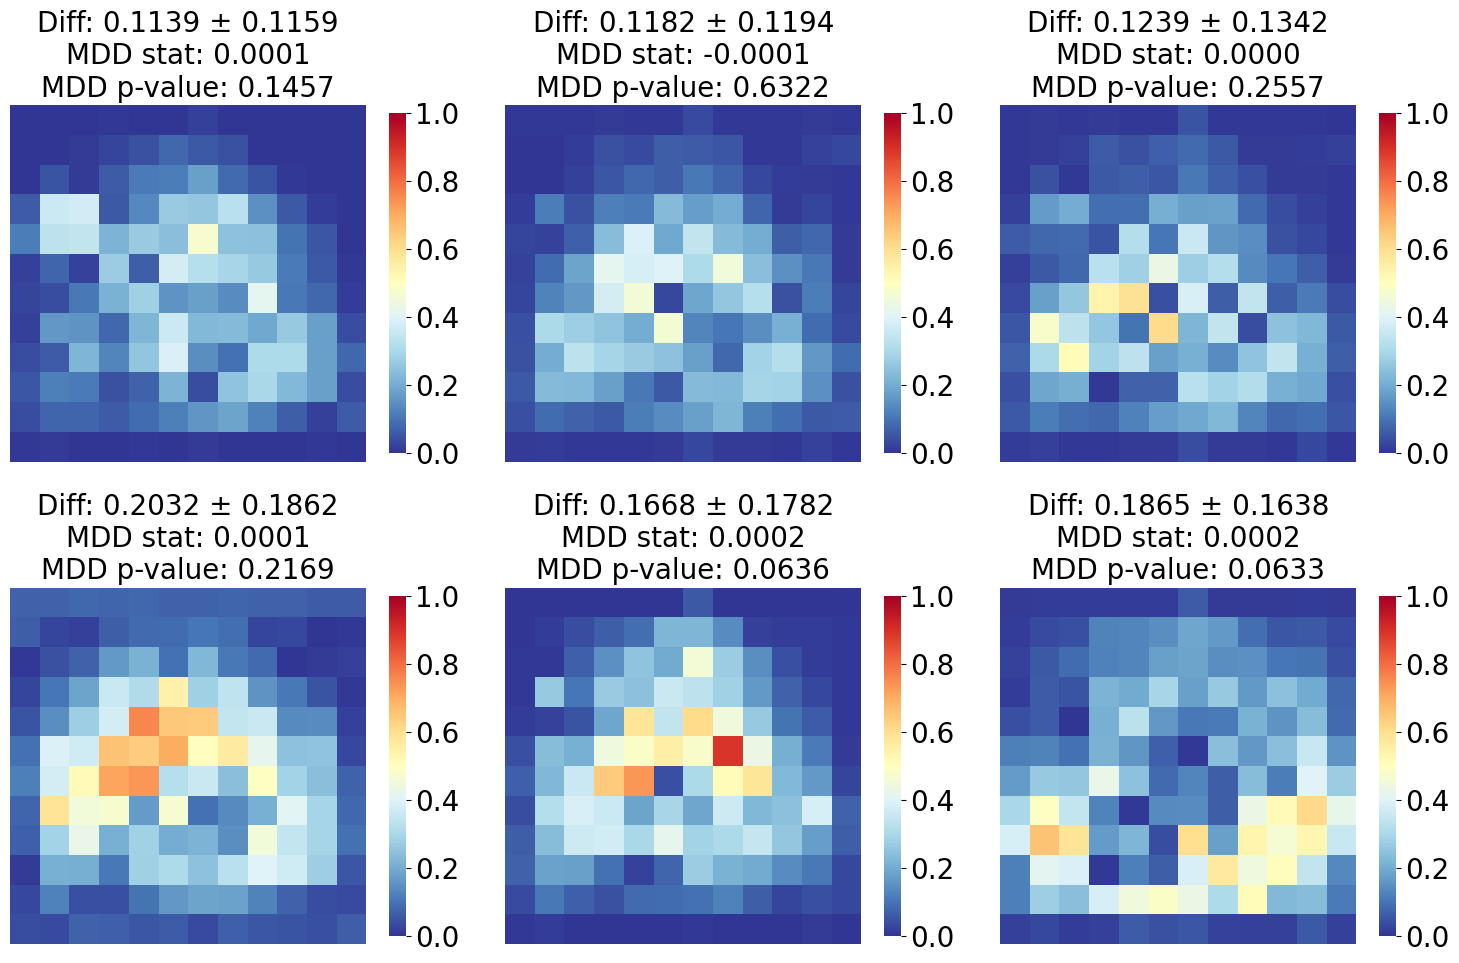

In [18]:
word1 = 'walking'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'walks'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )

In [9]:
array.shape

(36, 12, 12)

In [11]:
mean.shape

(12, 12)

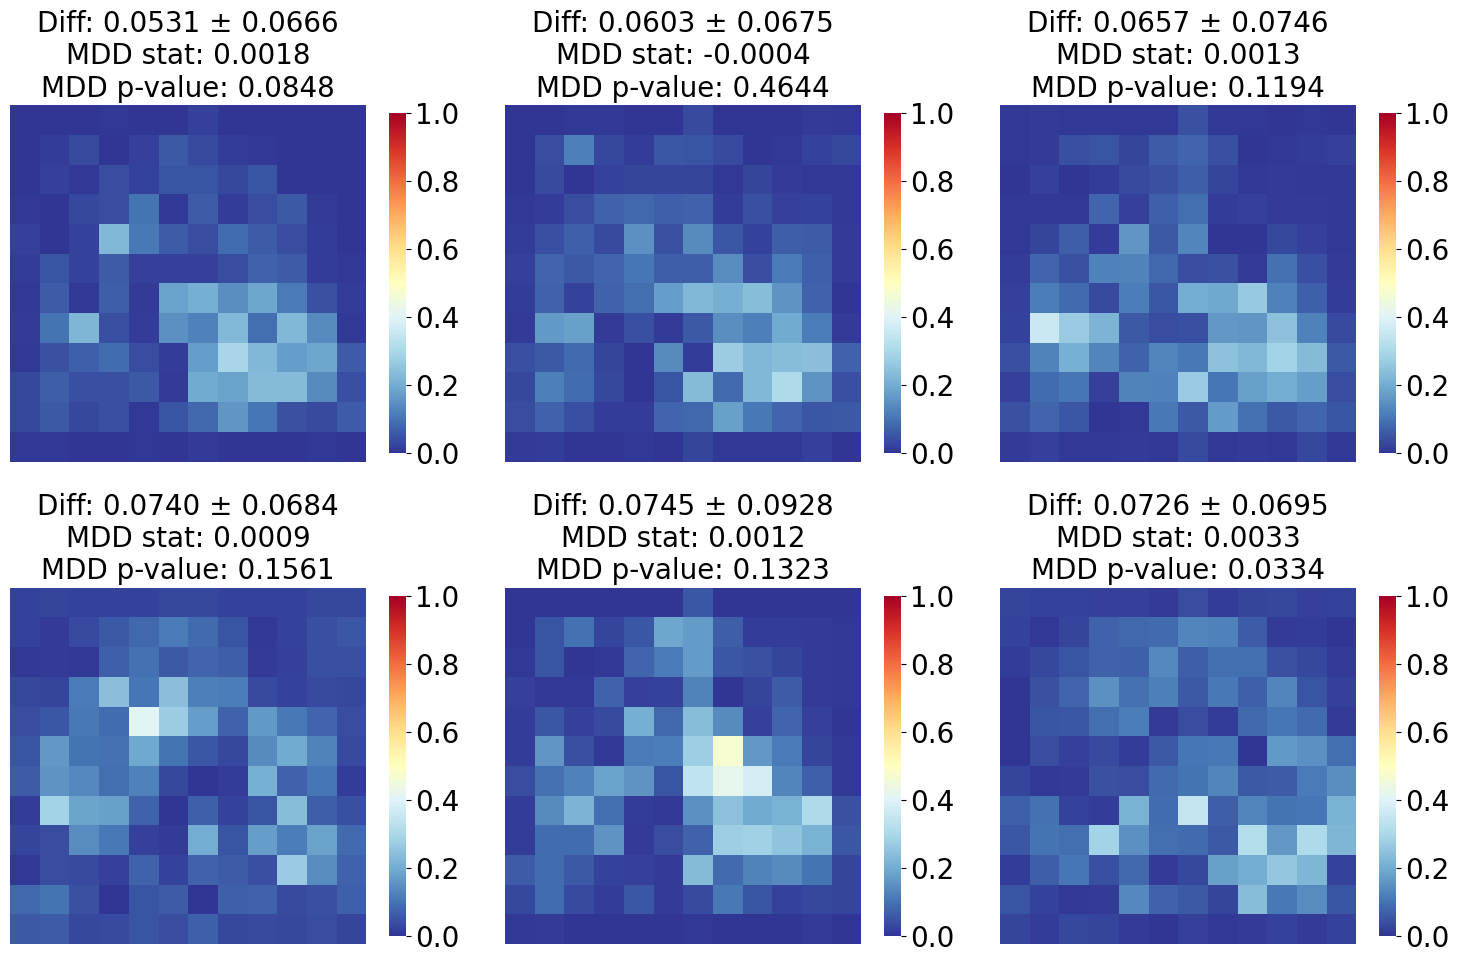

In [19]:
word1 = 'walking'
heads = []
g1 = {}
for i in range(6):
    g1[i+1] = np.array(d[f'{word1}_{i}'])
    mean = np.array(d[f'{word1}_{i}']).mean(axis=0)
    heads.append(mean / mean.max())
word2 = 'working'
g2 = {}
for i in range(6):
    g2[i+1] = np.array(d[f'{word2}_{i}'])
    mean = np.array(d[f'{word2}_{i}']).mean(axis=0)
#     heads[i] -= (mean / mean.max())
    heads[i] = abs(heads[i] - (mean / mean.max()))

tests = []
for i in range(6):
    X = [x.ravel() for x in g1[i+1]]
    Y = [x.ravel() for x in g2[i+1]]
    stat, pval = MMD().test(np.array(X), np.array(Y))
    tests.append([stat, pval])

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
for head in range(6):
    row = 0 if head < 3 else 1
    col = head if head < 3 else head - 3
    f = sns.heatmap(heads[head], cmap='RdYlBu_r', square=True, xticklabels=False, vmax=1, vmin=0
           , yticklabels=False, ax=ax[row][col], cbar_kws={"shrink": .79})
    cbar = f.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax[row][col].set_title(f'Diff: {heads[head].flatten().mean():.4f} ± {heads[head].flatten().std():.4f}' \
                            f'\nMDD stat: {tests[head][0]:.4f}'
                            f'\nMDD p-value: {tests[head][1]:.4f}'
                           , fontsize=20)
#     cax = ax.inset_axes([1.05, .0, .08, 1])
fig = f.get_figure()
fig.tight_layout()
fig.savefig(f"images/diffs/{word1}_{word2}_diff.pdf", )